# Data visualization for Lgg mri segmentation dataset
[Lgg segmentation dataset](https://www.kaggle.com/bonhart/brain-mri-data-visualization-unet-fpn)

In [1]:
# path to all data
DATA_PATH = "/workspace/data/lgg-mri-segmentation/kaggle_3m/"

# File path line length images for later sorting
# len(/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_ <-!!!43.tif)
BASE_LEN = 89
# len(/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_43 !!!->.tif)
END_IMG_LEN = 4
# (/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_43 !!!->_mask.tif)
END_MASK_LEN = 9

# img size
IMG_SIZE = 512


In [2]:
# docker install cv2
%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [3]:
import glob
import numpy as np
import pandas as pd
import random

import os

import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid import ImageGrid

plt.style.use("dark_background")


/tmp/ipykernel_181578/3990465171.py:10: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid import ImageGrid


# Data 
## Creating a DataFrame

In [4]:
# Raw data
data_map = []
for sub_dir_path in glob.glob(DATA_PATH+"*"):
    if os.path.isdir(sub_dir_path):
        dirname = sub_dir_path.split("/")[-1]
        for filename in os.listdir(sub_dir_path):
            image_path = sub_dir_path + "/" + filename
            data_map.extend([dirname, image_path])
    else:
        print("This is not a dir:", sub_dir_path)


df = pd.DataFrame({"dirname": data_map[::2],
                  "path": data_map[1::2]})
df.head()


This is not a dir: /workspace/data/lgg-mri-segmentation/kaggle_3m/data.csv
This is not a dir: /workspace/data/lgg-mri-segmentation/kaggle_3m/README.md


,dirname,path
0,TCGA_DU_6400_19830518,/workspace/data/lgg-mri-segmentation/kaggle_3m...
1,TCGA_DU_6400_19830518,/workspace/data/lgg-mri-segmentation/kaggle_3m...
2,TCGA_DU_6400_19830518,/workspace/data/lgg-mri-segmentation/kaggle_3m...
3,TCGA_DU_6400_19830518,/workspace/data/lgg-mri-segmentation/kaggle_3m...
4,TCGA_DU_6400_19830518,/workspace/data/lgg-mri-segmentation/kaggle_3m...


In [5]:
# masks / not masks
df_imgs = df[~df['path'].str.contains("mask")]
df_masks = df[df['path'].str.contains("mask")]

# data sorting
imgs = sorted(df_imgs["path"].values,
              key=lambda x: int(x[BASE_LEN: -END_IMG_LEN]))
masks = sorted(df_masks["path"].values,
               key=lambda x: int(x[BASE_LEN:-END_MASK_LEN]))

# sorting check
idx = random.randint(0, len(imgs)-1)
print("path to the image:", imgs[idx])
print("path to the mask:", masks[idx])


path to the image: /workspace/data/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7884_19980913/TCGA_HT_7884_19980913_11.tif
path to the mask: /workspace/data/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7884_19980913/TCGA_HT_7884_19980913_11_mask.tif


# Final dataframe 

In [6]:
# final dataframe
df = pd.DataFrame({
    "patient": df_imgs.dirname.values,
    "image_path": imgs,
    "mask_path": masks
})

# adding A/B column for diagnosis


def positiv_negativ_diagnosis(mask_path):
    value = np.max(cv2.imread(mask_path))
    if value > 0:
        return 1
    else:
        return 0


df["diagnosis"] = df["mask_path"].apply(lambda m: positiv_negativ_diagnosis(m))
df


,patient,image_path,mask_path,diagnosis
0,TCGA_DU_6400_19830518,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0
1,TCGA_DU_6400_19830518,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0
2,TCGA_DU_6400_19830518,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0
3,TCGA_DU_6400_19830518,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0
4,TCGA_DU_6400_19830518,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0
...,...,...,...,...
3924,TCGA_HT_7874_19950902,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0
3925,TCGA_HT_7874_19950902,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0
3926,TCGA_HT_7874_19950902,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0
3927,TCGA_HT_7874_19950902,/workspace/data/lgg-mri-segmentation/kaggle_3m...,/workspace/data/lgg-mri-segmentation/kaggle_3m...,0


# Data Distribution 

## Distribution of positive/negative diagnosis

Text(1.2, 2550, 'Total 3929 images')

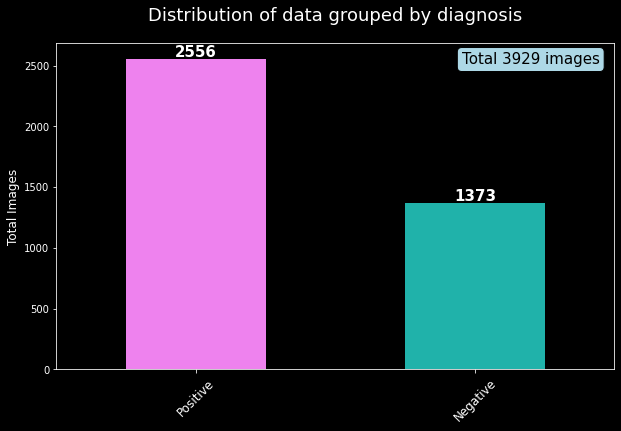

In [7]:
# plot
ax = df.diagnosis.value_counts().plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['violet', 'lightseagreen']
)

ax.set_xticklabels(["Positive", "Negative"], rotation=45, fontsize=12)
ax.set_ylabel('Total Images', fontsize=12)
ax.set_title('Distribution of data grouped by diagnosis', fontsize=18, y=1.05)

# Annotate
for i, rows in enumerate(df.diagnosis.value_counts().values):
    ax.annotate(int(rows), xy=(i, rows-12),
                rotation=0, color="white",
                ha='center', verticalalignment='bottom',
                fontsize=15, fontweight='bold')

ax.text(1.2, 2550, f"Total {len(df)} images", size=15,
        color="black",
        ha="center", va="center",
        bbox=dict(boxstyle="round",
                   fc=("lightblue"),
                   ec=("black"),
                  )
        )


# Distribution of positive/negative diagnosis between each patient

'for i, rows in enumerate(patients_by_diagnosis.values):\n    plt.annotate(int(rows[0]), xy=(i, rows[0]+1), rotation=90, color="white")\n    plt.annotate(int(rows[1]), xy=(i, rows[1]+1), rotation=90, color="aqua")'

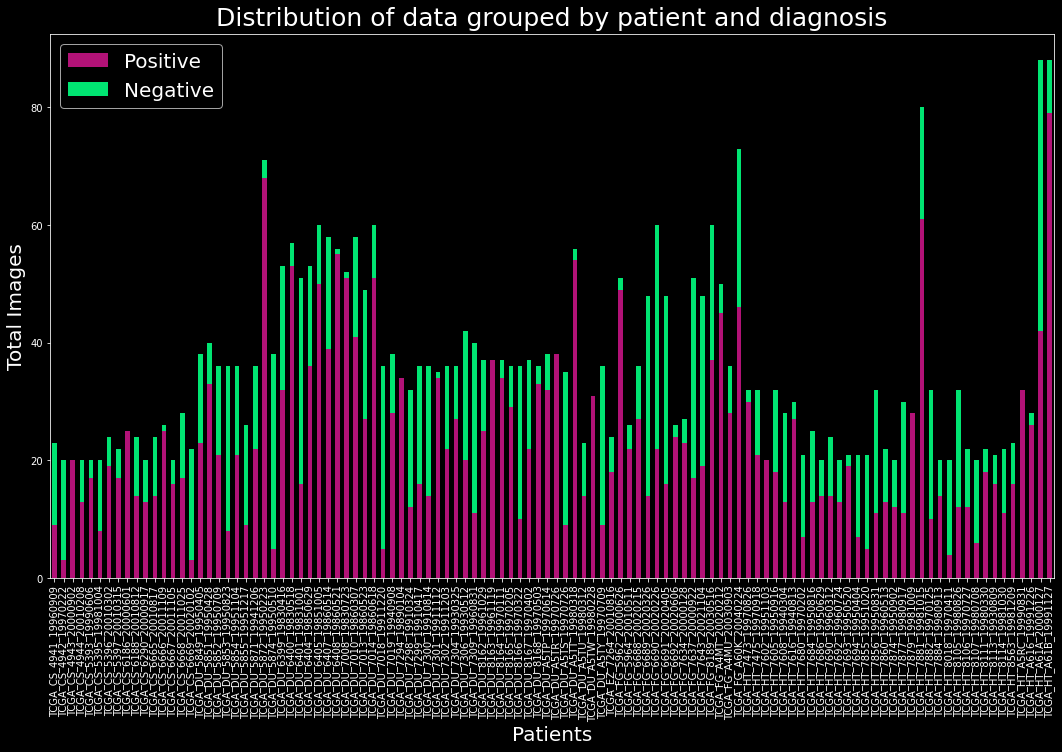

In [8]:
# Data
patients_by_diagnosis = df.groupby(['patient', 'diagnosis'])[
    'diagnosis'].size().unstack().fillna(0)
patients_by_diagnosis.columns = ["Positive", "Negative"]

# Plot
ax = patients_by_diagnosis.plot(kind='bar', stacked=True,
                                figsize=(18, 10),
                                color=["mediumvioletred", "springgreen"],
                                alpha=0.9)
ax.legend(fontsize=20)
ax.set_xlabel('Patients', fontsize=20)
ax.set_ylabel('Total Images', fontsize=20)
ax.set_title("Distribution of data grouped by patient and diagnosis",
             fontsize=25, y=1.005)

# Annotations
"""for i, rows in enumerate(patients_by_diagnosis.values):
    plt.annotate(int(rows[0]), xy=(i, rows[0]+1), rotation=90, color="white")
    plt.annotate(int(rows[1]), xy=(i, rows[1]+1), rotation=90, color="aqua")"""


# Data Visualiation 
## smaples of images with a positive and negative diagnosis

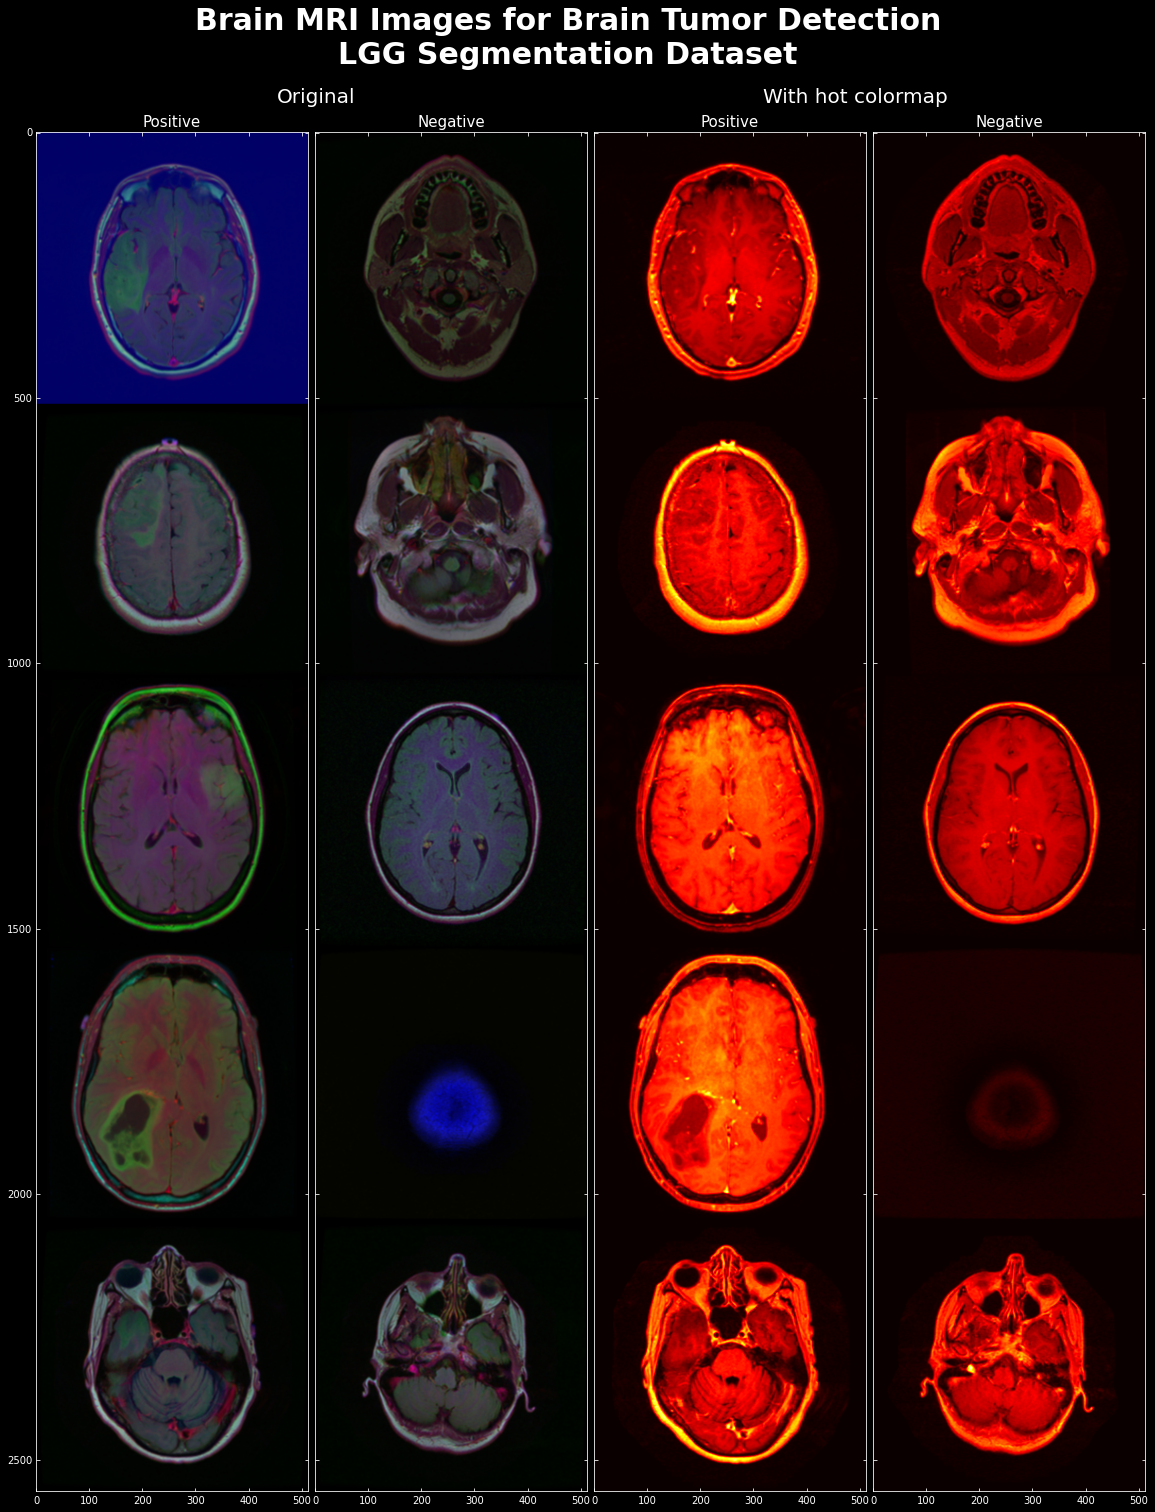

In [9]:
# Data
sample_yes_df = df[df["diagnosis"] == 1].sample(5).image_path.values
sample_no_df = df[df["diagnosis"] == 0].sample(5).image_path.values

sample_imgs = []
for i, (yes, no) in enumerate(zip(sample_yes_df, sample_no_df)):
    yes = cv2.resize(cv2.imread(yes), (IMG_SIZE, IMG_SIZE))
    no = cv2.resize(cv2.imread(no), (IMG_SIZE, IMG_SIZE))
    sample_imgs.extend([yes, no])

sample_yes_arr = np.vstack(np.array(sample_imgs[::2]))
sample_no_arr = np.vstack(np.array(sample_imgs[1::2]))

# Plot
fig = plt.figure(figsize=(25., 25.))
grid = ImageGrid(
    fig, 111,  # similar to subplot(111)
    nrows_ncols=(1, 4),  # creates 2x2 grid of axes
    axes_pad=0.1  # pad between axes in inch.
)

# put sample to grid
grid[0].imshow(sample_yes_arr)
grid[0].set_title("Positive", fontsize=15)
grid[0].axis("off")
grid[1].imshow(sample_no_arr)
grid[1].set_title("Negative", fontsize=15)
grid[1].axis("off")

grid[2].imshow(sample_yes_arr[:, :, 0], cmap="hot")
grid[2].set_title("Positive", fontsize=15)
grid[2].axis("off")
grid[3].imshow(sample_no_arr[:, :, 0], cmap="hot")
grid[3].set_title("Negative", fontsize=15)
grid[3].axis("off")

# annotations
plt.figtext(0.36, 0.90, "Original", va="center", ha="center", size=20)
plt.figtext(0.66, 0.90, "With hot colormap", va="center", ha="center", size=20)
plt.suptitle("Brain MRI Images for Brain Tumor Detection\nLGG Segmentation Dataset",
             y=.95, fontsize=30, weight="bold")

# save and show
plt.savefig("dataset.png", bbox_inches='tight',
            pad_inches=0.2, transparent=True)
plt.show()


# Samples of images and masks with a positive diagnosis

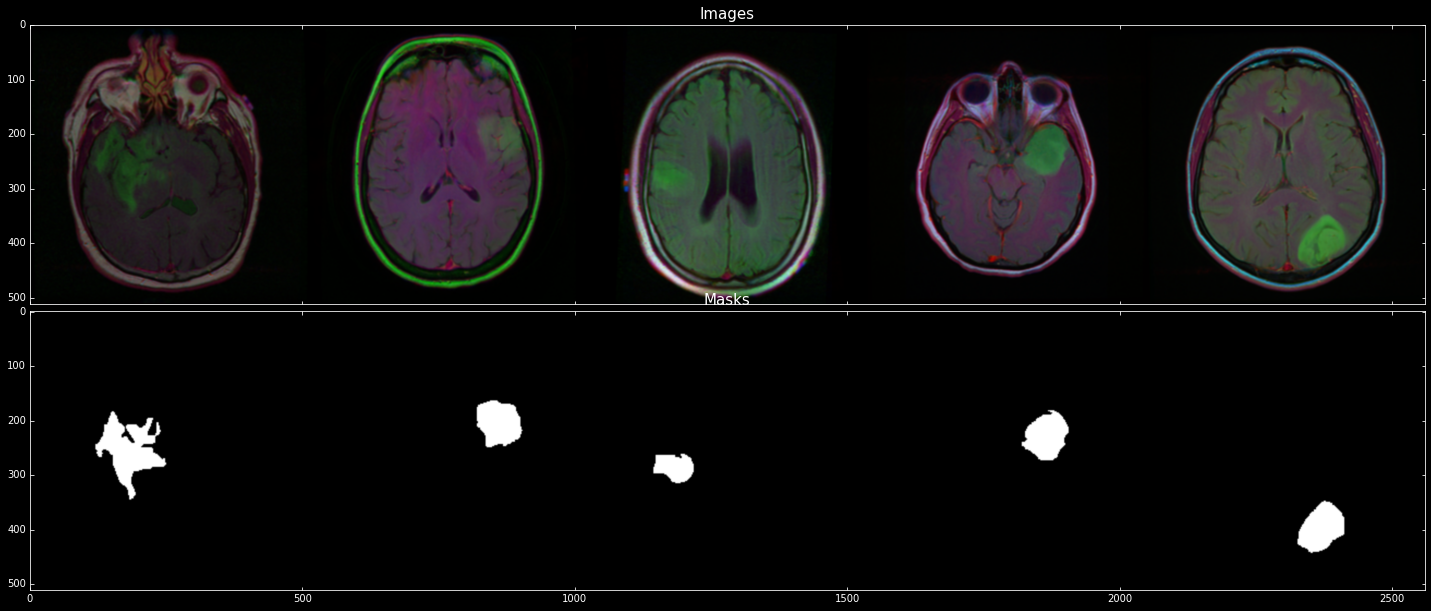

In [10]:
# Data
sample_df = df[df["diagnosis"] == 1].sample(5).values
sample_imgs = []
for i, data in enumerate(sample_df):
    img = cv2.resize(cv2.imread(data[1]), (IMG_SIZE, IMG_SIZE))
    mask = cv2.resize(cv2.imread(data[2]), (IMG_SIZE, IMG_SIZE))
    sample_imgs.extend([img, mask])

sample_imgs_arr = np.hstack(np.array(sample_imgs[::2]))
sample_masks_arr = np.hstack(np.array(sample_imgs[1::2]))

# plot
fig = plt.figure(figsize=(25., 25.))
grid = ImageGrid(
    fig, 111,
    nrows_ncols=(2, 1),
    axes_pad=0.1,
)

grid[0].imshow(sample_imgs_arr)
grid[0].set_title("Images", fontsize=15)
grid[0].axis("off")
grid[1].imshow(sample_masks_arr)
grid[1].set_title("Masks", fontsize=15)
grid[1].axis("off")
plt.show()


# DataGenerator and Data Augmentation 

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import albumentations as A
from albumentations.pytorch import ToTensor # cannt use larger than 0.5 version

from sklearn.model_selection import train_test_split


In [12]:
# DataGenerator
class BrainMriDataset(Dataset):
    def __init__(self, df, transforms):

        self.df = df
        self.transforms = transforms

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image = cv2.imread(self.df.iloc[idx, 1])
        mask = cv2.imread(self.df.iloc[idx, 2], 0)

        augmented = self.transforms(image=image,
                                    mask=mask
                                    )

        image = augmented['image']
        mask = augmented['mask']

        return image, mask

In [14]:
# transforms
PATCH_SIZE = 128

strong_transforms = A.Compose([
    A.RandomResizedCrop(width=PATCH_SIZE, height=PATCH_SIZE, p=1.0),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5), 
    A.RandomRotate90(p=0.5), 
    A.Transpose(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.01, scale_limit=0.04, rotate_limit=0, p=0.25),

    # Pixels
    A.RandomBrightnessContrast(p=0.5),
    A.RandomGamma(p=0.25),
    A.IAAEmboss(p=0.25),
    A.Blur(p=0.01, blur_limit=3),

    # Affine
    A.OneOf([
        A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
        A.GridDistortion(p=0.5),
        A.OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)
    ], p=0.8),

    A.Normalize(p=1.0),
    ToTensor(),
])

transforms = A.Compose([
     A.Resize(width = PATCH_SIZE, height = PATCH_SIZE, p=1.0),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.Transpose(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.01, scale_limit=0.04, rotate_limit=0, p=0.25),
    
    A.Normalize(p=1.0),
    ToTensor(),
])

# Split data on train val test 

In [15]:
# split df into train_df and val_df 
train_df, val_df = train_test_split(df, stratify=df.diagnosis, test_size=0.1)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# split train_df into train_df and test_df
train_df, test_df = train_test_split(train_df, stratify=train_df.diagnosis, test_size=0.15)
train_df = train_df.reset_index(drop=True)

print(f"Train: {train_df.shape} \nVal: {val_df.shape} \nTest: {test_df.shape}")

Train: (3005, 4) 
Val: (393, 4) 
Test: (531, 4)


In [16]:
# train
train_dataset = BrainMriDataset(df=train_df, transforms=transforms)
train_dataloader = DataLoader(train_dataset, batch_size=26, num_workers=1, shuffle=True)

# val
val_dataset = BrainMriDataset(df=val_df, transforms=transforms)
val_dataloader = DataLoader(val_dataset, batch_size=26, num_workers=1, shuffle=True)

#test
test_dataset = BrainMriDataset(df=test_df, transforms=transforms)
test_dataloader = DataLoader(test_dataset, batch_size=26, num_workers=1, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([26, 3, 128, 128]) torch.Size([26, 1, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

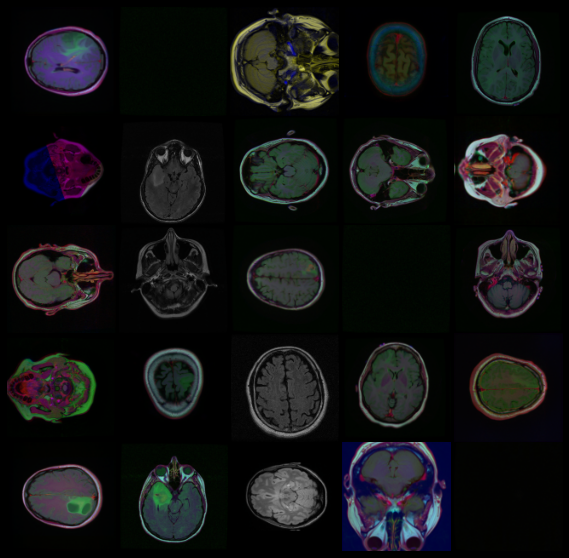

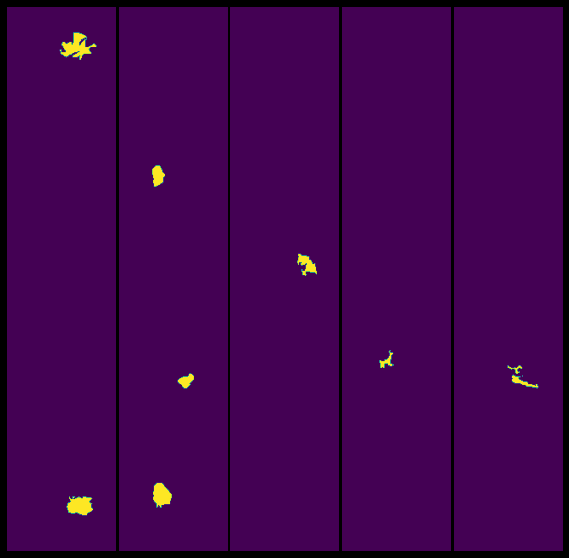

In [17]:
# augmentation visualization 
def show_aug(inputs, nrows=5, ncols=5, image=True):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(wspace=0., hspace=0.)
    i_ = 0
    
    if len(inputs) > 25:
        inputs = inputs[:25]
        
    for idx in range(len(inputs)):
    
        # normalization
        if image is True:           
            img = inputs[idx].numpy().transpose(1,2,0)
            mean = [0.485, 0.456, 0.406]
            std = [0.229, 0.224, 0.225] 
            img = (img*std+mean).astype(np.float32)
        else:
            img = inputs[idx].numpy().astype(np.float32)
            img = img[0,:,:]
        
        #plot
        #print(img.max(), len(np.unique(img)))
        plt.subplot(nrows, ncols, i_+1)
        plt.imshow(img); 
        plt.axis('off')
 
        i_ += 1
        
    return plt.show()

    
images, masks = next(iter(train_dataloader))
print(images.shape, masks.shape)

show_aug(images)
show_aug(masks, image=False)

In [ ]:
import torchvision
import torch.nn as nn
# inception_v3 = torchvision.models.Inception3()

alex_net = torchvision.models.AlexNet(num_classes=10).cuda()
# list = nn.Sequential(*list(alex_net.children))


In [ ]:
from torchinfo import summary

summary(alex_net, input_size=(3, 3, 299, 299))


Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  --                        --
├─Sequential: 1-1                        [3, 256, 8, 8]            --
│    └─Conv2d: 2-1                       [3, 64, 74, 74]           23,296
│    └─ReLU: 2-2                         [3, 64, 74, 74]           --
│    └─MaxPool2d: 2-3                    [3, 64, 36, 36]           --
│    └─Conv2d: 2-4                       [3, 192, 36, 36]          307,392
│    └─ReLU: 2-5                         [3, 192, 36, 36]          --
│    └─MaxPool2d: 2-6                    [3, 192, 17, 17]          --
│    └─Conv2d: 2-7                       [3, 384, 17, 17]          663,936
│    └─ReLU: 2-8                         [3, 384, 17, 17]          --
│    └─Conv2d: 2-9                       [3, 256, 17, 17]          884,992
│    └─ReLU: 2-10                        [3, 256, 17, 17]          --
│    └─Conv2d: 2-11                      [3, 256, 17, 17]         